## Multi Class Classification NN - Reuters

### Data Exploration

In [1]:
from keras.datasets import reuters

(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(path="reuters.npz",
                                                         num_words=10000,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# test_split: float. Fraction of the dataset to be used as test data.

/home/jay/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print(f"dim/rank/ no of axes of train_data >> {reuters_train_data.ndim}")
print(f"shape of train_data>> {reuters_train_data.shape}")

print('\n')
print(f"Type of train_data first element >> {type(reuters_train_data[0])}")
print(f"Size of train_data first element >> {(len(reuters_train_data[0]))}")
print(f"First Element train_data>> {reuters_train_data[0][0:218]}")
print('\n')
print(f"dim/rank/ no of axes of train_labels >> {reuters_train_labels.ndim}")
print(f"shape of train_labels>> {reuters_train_labels.shape}")

print('\n')

print(f"Type of train_labels >> {type(reuters_train_labels)}")
print(f"Type of train_labels first element >> {type(reuters_train_labels[0])}")
print(f"Size of train_labels>> {(len(reuters_train_labels))}")
print(f"Head of train_labels>> {(reuters_train_labels)[0:10]}")

dim/rank/ no of axes of train_data >> 1
shape of train_data>> (8982,)


Type of train_data first element >> <class 'list'>
Size of train_data first element >> 87
First Element train_data>> [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


dim/rank/ no of axes of train_labels >> 1
shape of train_labels>> (8982,)


Type of train_labels >> <class 'numpy.ndarray'>
Type of train_labels first element >> <class 'numpy.int64'>
Size of train_labels>> 8982
Head of train_labels>> [ 3  4  3  4  4  4  4  3  3 16]


#### Content Exploration - Pandas

In [4]:
import pandas as pd
print (pd.DataFrame(reuters_test_labels).head())
print (pd.DataFrame(reuters_train_labels).head())

    0
0   3
1  10
2   1
3   4
4   4
   0
0  3
1  4
2  3
3  4
4  4


#### Content Exploration

In [5]:
reuters_word_index:dict = reuters.get_word_index(path="reuters_word_index.json")
print('\n')
print(f"Type of word index >> {type(reuters_word_index)}")
print('Observing samples of word index key value pair >> ')
print(f"Length of dict/ Number of words >> {len(reuters_word_index.keys())}")
print(list(reuters_word_index.keys())[0:5])
print(list(reuters_word_index.values())[0:5])

print('\n')
reuters_reverse_word_index :dict = {}
for (k,v) in reuters_word_index.items():
    reuters_reverse_word_index[v] = k

for element in reuters_train_data[0]:
    print(reuters_reverse_word_index[element],end=" ")
    
print('\n')
for element in reuters_train_data[1]:
    print(reuters_reverse_word_index[element],end=" ")
    
print('\n')    
for element in reuters_train_data[2]:
    print(reuters_reverse_word_index[element],end=" ")



Type of word index >> <class 'dict'>
Observing samples of word index key value pair >> 
Length of dict/ Number of words >> 30979
['mdbl', 'fawc', 'degussa', 'woods', 'hanging']
[10996, 16260, 12089, 8803, 13796]


the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs 

the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 american east said in council takes of of france a but u any 4 s 1st losses pct dlrs 

the lt dlrs demand 000 reuter dividend year lt plus billion 04 000 reuter divide

### Data Preprocessing

#### One-Hot Encoding - Data

In [6]:
import numpy as np
def reuters_one_hot_encode(data,no_of_words=10000):
    encoded_data = np.zeros([data.size, no_of_words], dtype=int)
    for i in range(data.size):
        article:list = data[i]
        for j in range(len(article)):
            encoded_data[i,article[j]]= 1
    return encoded_data

reuters_prep_train_data= reuters_one_hot_encode(data=reuters_train_data,no_of_words=10000)
reuters_prep_test_data= reuters_one_hot_encode(data=reuters_test_data,no_of_words=10000)

print()
print(f"First Review Before Encode >> {reuters_train_data[0]}")
print(f"Slice of First Review After Encode >> {reuters_prep_train_data[0,0:70]}")
print(f"Shape of Preprocessed Train Data >> {reuters_prep_train_data.shape}")
print(f"Shape of Preprocessed Test Data >> {reuters_prep_test_data.shape}")

import pandas as pd
print (pd.DataFrame(reuters_prep_train_data).head())
print (pd.DataFrame(reuters_prep_test_data).head())


First Review Before Encode >> [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Slice of First Review After Encode >> [0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Shape of Preprocessed Train Data >> (8982, 10000)
Shape of Preprocessed Test Data >> (2246, 10000)
   0     1     2     3     4     5     6     7     8     9     ...   9990  \
0     0     1     1     0     1     1     1     1     1     1  ...      0   
1     0     1     1     0     1     1     0     1     1     1  ...      0   
2     0     1     1     0     1     1     0     1     0     1  ...      0   
3     0     1     1   

#### One-Hot Encoding - Labels

In [7]:

import numpy as np
def reuters_one_hot_encode_labels(labels,no_of_words=46):
    encoded_labels = np.zeros([labels.size, no_of_words], dtype=int)
    #print(f"encoded_labels >> {encoded_labels[0,0:20]}")
    for i in range(labels.size):
        encoded_labels[i,labels[i]]= 1
    return encoded_labels


reuters_prep_test_labels= reuters_one_hot_encode_labels(labels=reuters_test_labels,no_of_words=46)
reuters_prep_train_labels= reuters_one_hot_encode_labels(labels=reuters_train_labels,no_of_words=46)


print()
print(f"Type of Test Labels Before Encode >> {type(reuters_test_labels)}")
print(f"Shape of Test Labels Before Encode >> {reuters_test_labels.shape}")
print(f"Shape of Train Labels Before Encode >> {reuters_train_labels.shape}")


import pandas as pd
print (pd.DataFrame(reuters_prep_test_labels).head())
print (pd.DataFrame(reuters_prep_train_labels).head())



Type of Test Labels Before Encode >> <class 'numpy.ndarray'>
Shape of Test Labels Before Encode >> (2246,)
Shape of Train Labels Before Encode >> (8982,)
   0   1   2   3   4   5   6   7   8   9  ...  36  37  38  39  40  41  42  43  \
0   0   0   0   1   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
2   0   1   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
3   0   0   0   0   1   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
4   0   0   0   0   1   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   

   44  45  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 46 columns]
   0   1   2   3   4   5   6   7   8   9  ...  36  37  38  39  40  41  42  43  \
0   0   0   0   1   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
1   0   0   0   0   1   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
2   0   0   0   1   

In [8]:
reuters_x_val_train_data = reuters_prep_train_data[0:1000]
reuters_x_train_data = reuters_prep_train_data[1000:]

reuters_y_val_train_labels = reuters_prep_train_labels[0:1000]
reuters_y_train_labels = reuters_prep_train_labels[1000:]

reuters_x_test_data = reuters_prep_test_data
reuters_y_test_labels = reuters_prep_test_labels


### Training

#### Model Building

In [9]:
from keras import models
from keras import layers

reuters_model = models.Sequential()
reuters_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
reuters_model.add(layers.Dense(64, activation='relu'))
reuters_model.add(layers.Dense(46, activation='softmax'))


reuters_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

reuters_history = reuters_model.fit(x=reuters_x_train_data,
                    y=reuters_y_train_labels,
                    batch_size=512,
                    epochs=20,
                    verbose=0,
                    validation_data=(reuters_x_val_train_data,reuters_y_val_train_labels))

#### Model Visualisation

In [10]:
import matplotlib.pyplot as plt

print(f"Type of history object >> {type(reuters_history)}")
print(f"History Keys >> {reuters_history.history.keys()}")
print((reuters_history.history['acc']))

acc_values = reuters_history.history['acc']
val_acc_values = reuters_history.history['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Type of history object >> <class 'keras.callbacks.History'>
History Keys >> dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.49599097982381285, 0.6880481086766561, 0.7645953385879509, 0.8167126028348377, 0.8490353302530286, 0.8802305176663715, 0.905412177085518, 0.9238286149498813, 0.9313455267347988, 0.9412427972624159, 0.9473816075291558, 0.9507642197776217, 0.9526434482353667, 0.9557754942660521, 0.955775494848508, 0.9559007760457484, 0.957278878250925, 0.9576547232166445, 0.9594086689089988, 0.959909796445957]


<Figure size 640x480 with 1 Axes>

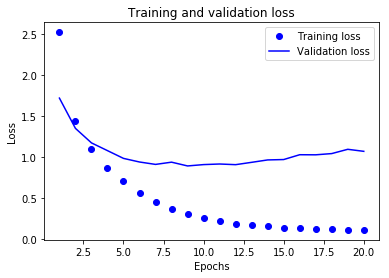

In [11]:
loss_values = reuters_history.history['loss']
val_loss_values = reuters_history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Testing

#### Prediction

In [12]:
reuters_results = reuters_model.predict(reuters_x_test_data)
print(f"Type of results object >> {type(reuters_results)}")
print(f"NDim of results object >> {reuters_results.ndim}")
print(f"Shape of results object >> {reuters_results.shape}")
print(reuters_results)

print("\nCompare Predicted & Real  Labels: \n")
print(f"First 10 Predicted Labels >>", end = " ")
for i in range(10):
    print(np.argmax(reuters_results[i]), end = " ")

print(f"\nFirst 10 Original Labels >> {(reuters_test_labels)[0:10]}")

Type of results object >> <class 'numpy.ndarray'>
NDim of results object >> 2
Shape of results object >> (2246, 46)
[[1.03244372e-06 8.83560062e-07 5.50000001e-09 ... 2.95477798e-09
  9.84580861e-10 1.09985521e-09]
 [5.79718850e-04 2.71197851e-03 3.02110578e-07 ... 9.87854065e-09
  8.23253632e-10 9.76922274e-06]
 [2.31068656e-02 8.78008485e-01 4.59660223e-04 ... 4.89597005e-06
  2.07372682e-06 3.10176110e-05]
 ...
 [2.14568274e-07 1.53669669e-06 6.24842684e-08 ... 1.79733006e-09
  1.13601475e-08 2.04953277e-09]
 [2.17771484e-03 1.42026722e-01 3.15064273e-04 ... 2.57475676e-05
  1.10368990e-06 2.36054802e-06]
 [6.89421431e-05 6.96897864e-01 2.24178266e-02 ... 2.04988979e-07
  1.09187825e-09 1.34495269e-06]]

Compare Predicted & Real  Labels: 

First 10 Predicted Labels >> 3 10 1 4 13 3 3 3 3 3 
First 10 Original Labels >> [ 3 10  1  4  4  3  3  3  3  3]


#### Evaluation

In [13]:
reuters_score = reuters_model.evaluate(x=reuters_x_test_data,y=reuters_y_test_labels)

print(model.metrics_names)
print(f"The accuracy of the model >> {reuters_score[1]}")

2246/2246 [==============================] - 0s 222us/step


NameError: name 'model' is not defined